# Relatório de Gorjetas

## Importando base de dados

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

In [138]:
dados = pd.read_csv('../Data/Tips.csv')

In [139]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Tradução

### Nome das colunas

In [140]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [141]:
renomear = {
    'total_bill' : 'valor_da_conta',
    'tip': 'gorjeta',
    'dessert' : 'sobremesa',
    'day' : 'dia_da_semana',
    'time' : 'hora_do_dia',
    'size' : 'total_de_pessoas'
}

In [142]:
type(renomear)

dict

In [143]:
gorjetas = dados.rename(columns= renomear)

In [144]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


### Dados das Linhas

#### Coluna Sobremesa

In [145]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [146]:
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

In [147]:
type(sim_nao)

dict

In [148]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [149]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [150]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


#### Coluna dia_da_semana

In [151]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [152]:
dias = {
    'Sun': 'Domingo',
    'Mon': 'Segunda',
    'Tue': 'Terça',
    'Wed': 'Quarta',
    'Thur': 'Quinta',
    'Fri': 'Sexta',
    'Sat': 'Sábado'
}

In [153]:
type(dias)

dict

In [154]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [155]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


#### Coluna hora_do_dia

In [156]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [157]:
hora = {
    'Dinner': 'Jantar',
    'Lunch': 'Almoço'
}

In [158]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [159]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


## Análises gráficas

### Importando o Seaborn 

In [160]:
!pip install seaborn==0.9.0

You should consider upgrading via the 'a:\documentos\meusprojetos\data_science\cursos_alura\data_visualization_com_seaborn\scripts\python.exe -m pip install --upgrade pip' command.


In [161]:
import seaborn as sns

In [162]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: a:\documentos\meusprojetos\data_science\cursos_alura\data_visualization_com_seaborn\lib\site-packages
Requires: pandas, matplotlib, numpy, scipy
Required-by: 


### Análise 1 - Valor da conta e gorjeta

In [163]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

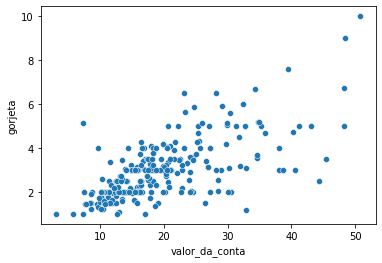

In [164]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

**Visualmente, o valor da gorjeta aumenta conforme o valor da conta**

In [165]:
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))
print('Registros não nulos:')
gorjetas.count()

A base de dados contém 244 registros 

Registros não nulos:


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

#### Criando o campo porcentagem

In [166]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [167]:
gorjetas['porcentagem'] = gorjetas.gorjeta / gorjetas.valor_da_conta

In [168]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [169]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [170]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


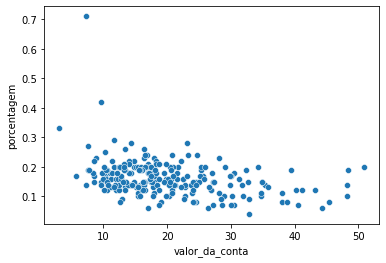

In [171]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

**Visualmente, o valor da conta não é proporcional ao valor da gorjeta**

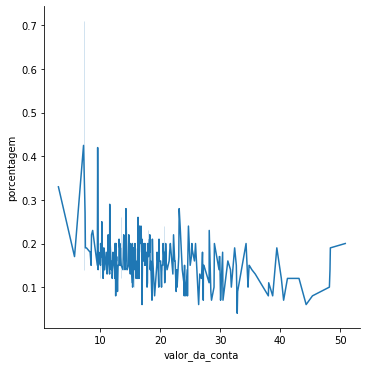

In [172]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

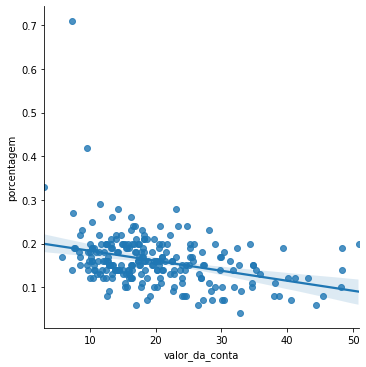

In [173]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

### Análise 2 - Sobremesas

In [174]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [175]:
gorjetas[gorjetas.sobremesa == 'Sim']

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
56,38.01,3.00,Sim,Sábado,Jantar,4,0.08
58,11.24,1.76,Sim,Sábado,Jantar,2,0.16
60,20.29,3.21,Sim,Sábado,Jantar,2,0.16
61,13.81,2.00,Sim,Sábado,Jantar,2,0.14
62,11.02,1.98,Sim,Sábado,Jantar,2,0.18
...,...,...,...,...,...,...,...
234,15.53,3.00,Sim,Sábado,Jantar,2,0.19
236,12.60,1.00,Sim,Sábado,Jantar,2,0.08
237,32.83,1.17,Sim,Sábado,Jantar,2,0.04
240,27.18,2.00,Sim,Sábado,Jantar,2,0.07


In [176]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [177]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


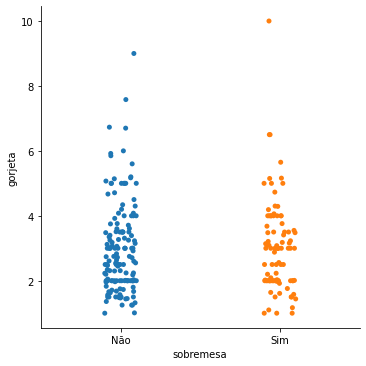

In [178]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

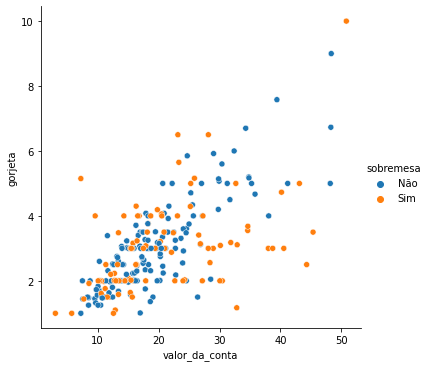

In [179]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

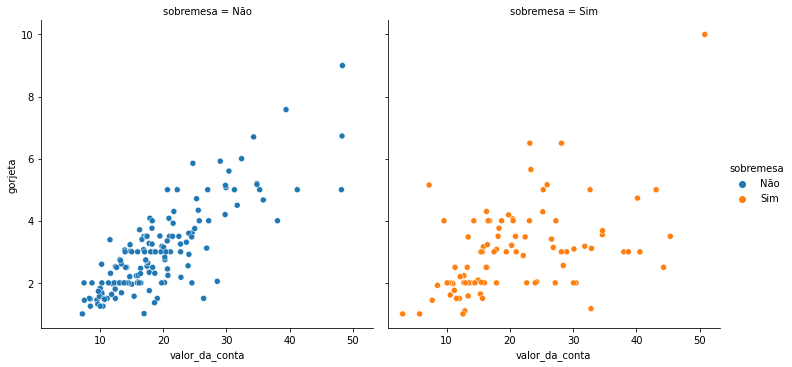

In [180]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

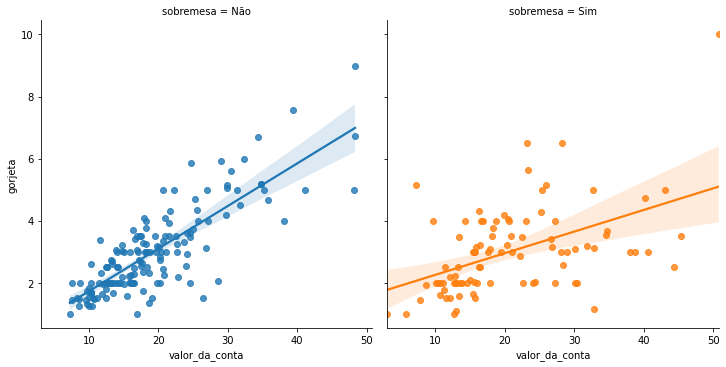

In [181]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

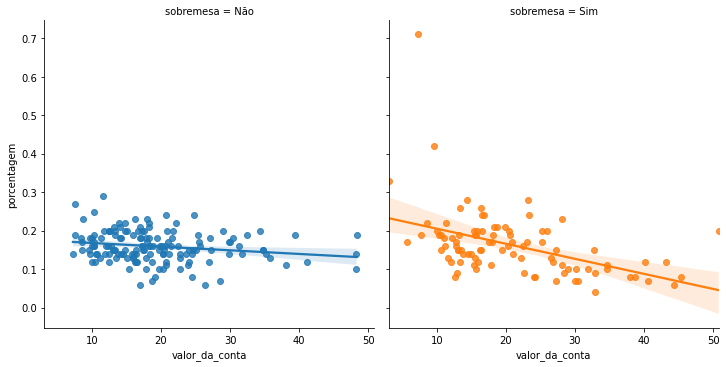

In [182]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

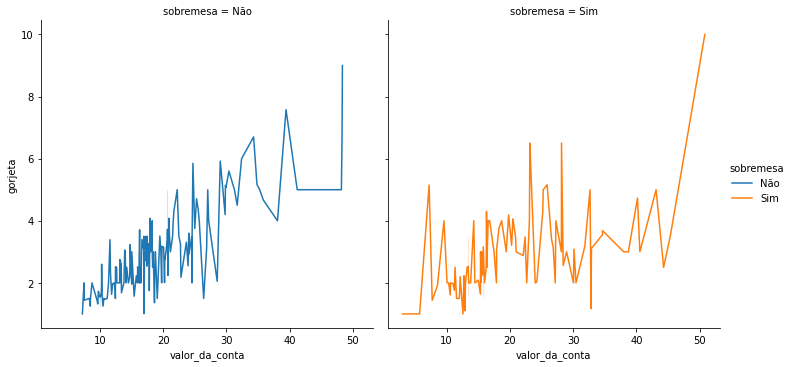

In [183]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa',kind='line' , data=gorjetas)

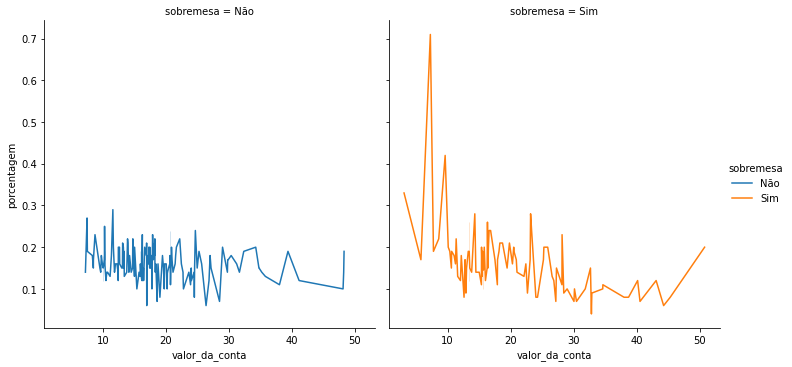

In [184]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa',kind='line' , data=gorjetas)

**Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremessa e não pediram sobremesa**

#### Teste de hipótese

**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**
> **A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [185]:
from scipy.stats import ranksums

In [186]:
sobremesa = gorjetas.query("sobremesa=='Sim'").porcentagem

In [187]:
sem_sobremesa = gorjetas.query("sobremesa=='Não'").porcentagem

In [188]:
r = ranksums(sobremesa, sem_sobremesa)

In [189]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

### Análise 3 - Dia da semana

In [190]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

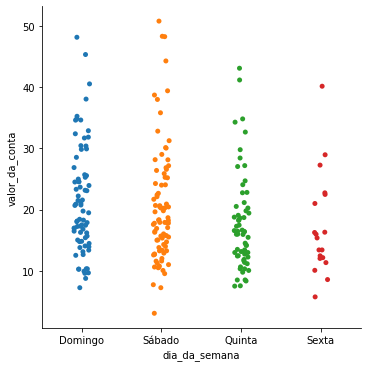

In [191]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

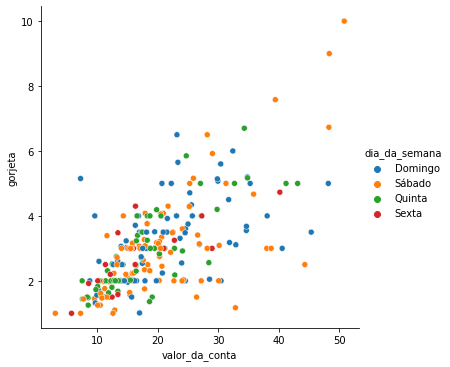

In [192]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

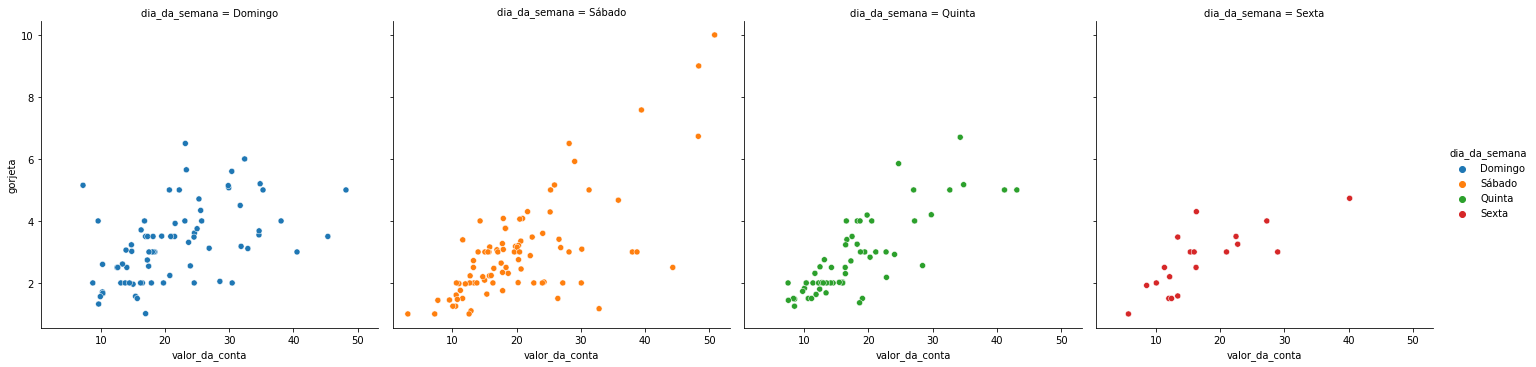

In [193]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

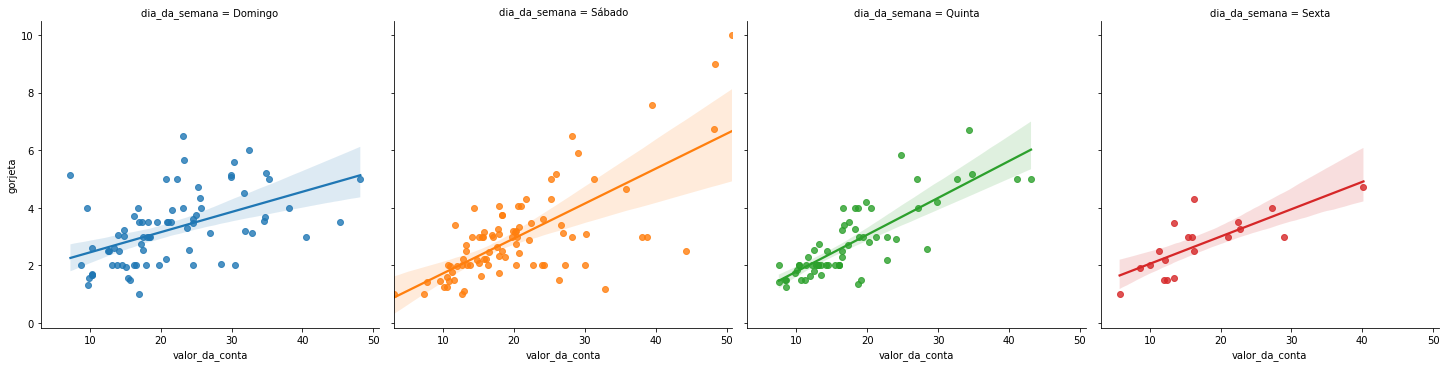

In [194]:
sns.lmplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

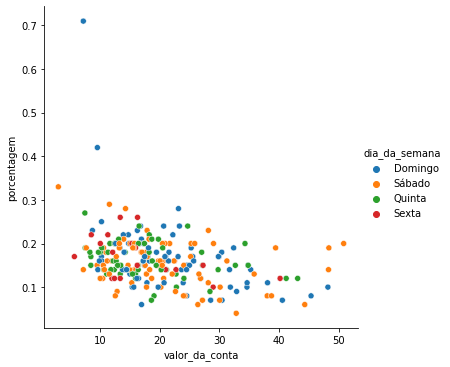

In [195]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

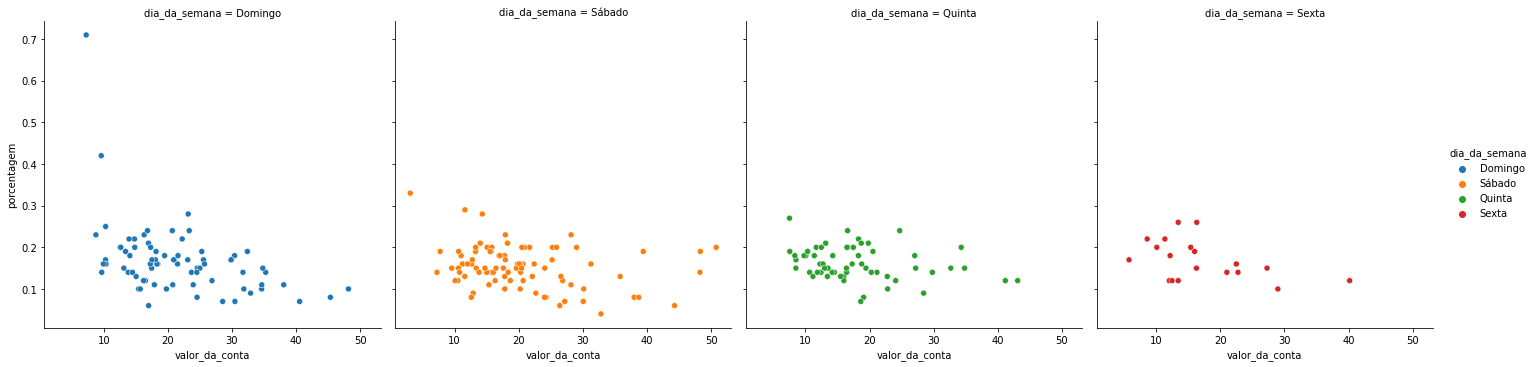

In [196]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

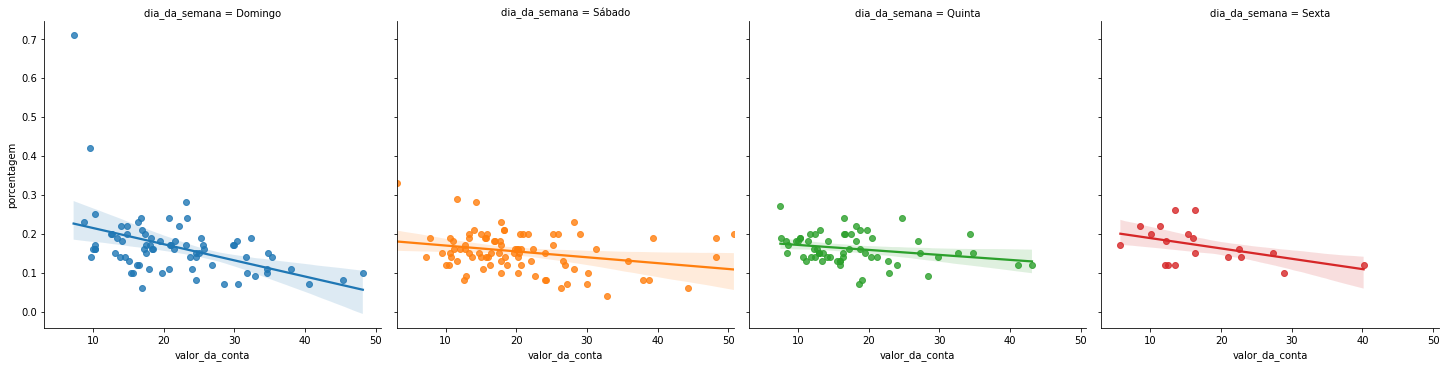

In [197]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [198]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [199]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.99827868852459


In [200]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [203]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

#### Teste de hipótese

**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**
>**A distribuição do valor da conta não é igual no sábado e no domingo**

In [214]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [215]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [217]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)

**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no sábado e no domingo**

In [222]:
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.3576728477868443
